# Cluttered Composite Dataset Demo

Visual sanity check for the Thorat-style cluttered dataset generator. Adjust config as needed (datasets, seeds, etc.).

In [1]:
import os
import sys
from pathlib import Path

repo_root = Path(os.getcwd()).resolve()
# If running with working directory inside notebooks/, move up to repo root
if repo_root.name == 'notebooks':
    repo_root = repo_root.parent

src_path = repo_root / 'src'
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

print(f"Repo root: {repo_root}")
print(f"Added to sys.path: {src_path}")


Repo root: /Users/lorenzleisner/Desktop/CogSci/Master/WI_SE_25/hands-on-neuroai
Added to sys.path: /Users/lorenzleisner/Desktop/CogSci/Master/WI_SE_25/hands-on-neuroai/src


In [5]:

from hands_on_neuroai.dataset_creation.clutter import (
    ClutteredDatasetConfig,
    build_cluttered_composite_dataset, 
)
import matplotlib.pyplot as plt
import torch


In [3]:
# Configure the dataset. Swap base_datasets to include CIFAR for RGB.
data_root = repo_root / 'data'
assert data_root.exists(), f"Data directory not found: {data_root}"

cfg = ClutteredDatasetConfig(
    base_datasets=("mnist", "fashion_mnist"),
    root=str(data_root),
    split="train",
    image_size=64,
    base_object_scale=0.44,
    num_clutter_objects=4,
    block_grid=2,
    num_samples=12,
    seed=123,
    return_aux_labels=False,
    download=False,  # set True if data is not already present
)

ds = build_cluttered_composite_dataset(cfg)
print(f"Dataset length: {len(ds)}; channels: {ds.out_channels}")


Dataset length: 12; channels: 1


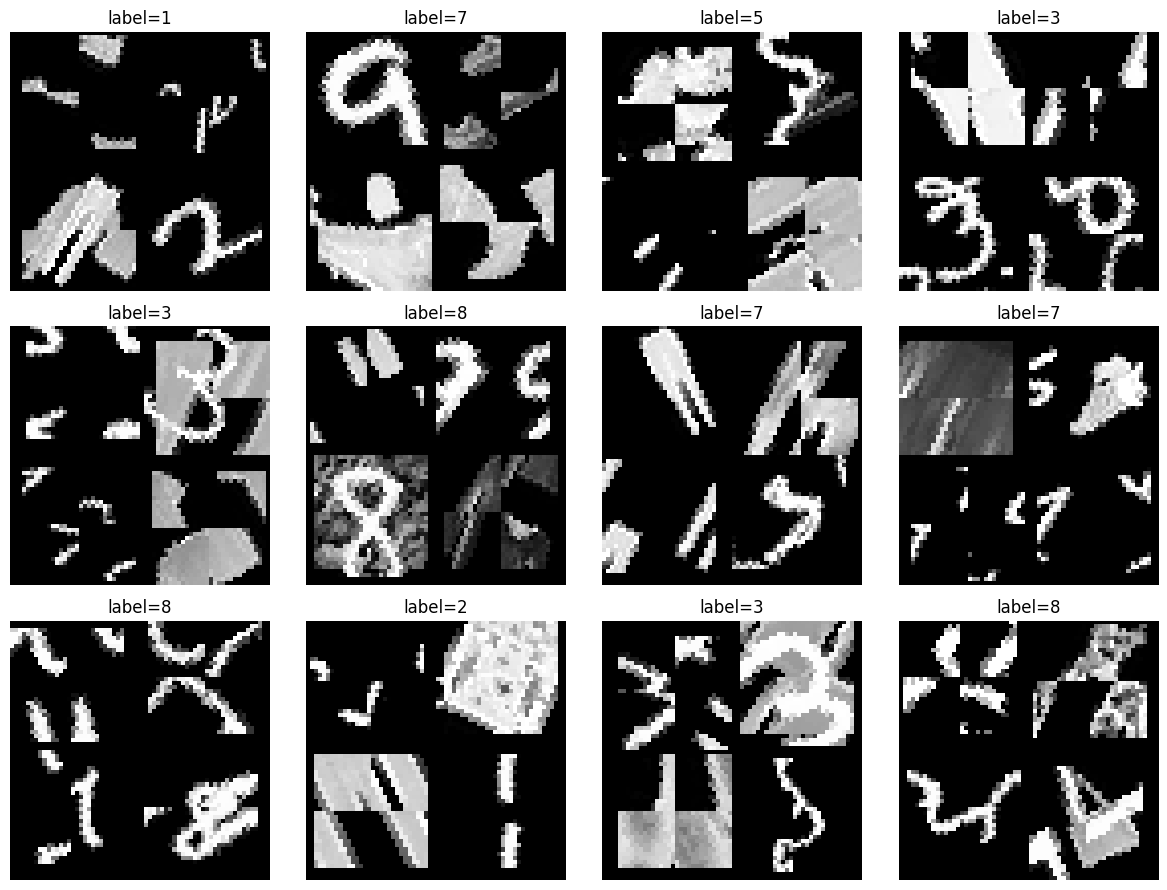

In [4]:
# Visualize a small batch
n_cols = 4
n_rows = int(torch.ceil(torch.tensor(len(ds) / n_cols)).item())
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows))
axes = axes.flat if len(ds) > 1 else [axes]

for ax, idx in zip(axes, range(len(ds))):
    sample = ds[idx]
    if cfg.return_aux_labels:
        img, label, aux = sample
    else:
        img, label = sample
        aux = None
    np_img = img.permute(1, 2, 0).detach().cpu()
    cmap = "gray" if np_img.shape[2] == 1 else None
    ax.imshow(np_img.squeeze(), cmap=cmap)
    title = f"label={label}"
    if aux:
        title += f"loc={aux['location']} scale={aux['scale_choice']:.2f} orient={aux['orientation_sign']:+.0f}"
    ax.set_title(title)
    ax.axis("off")

for ax in axes[len(ds):]:
    ax.axis("off")

plt.tight_layout()
plt.show()
